In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the dataset
data=pd.read_csv("C:/Users/sweta/Downloads/Amazon Sale Report.csv")
data.head(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [6]:
data.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [7]:
# Calculate the percentage of missing values in each column
missing_data = data.isnull().mean() * 100
print("Percentage of missing values in each column:\n", missing_data)


Percentage of missing values in each column:
 index                   0.000000
Order ID                0.000000
Date                    0.000000
Status                  0.000000
Fulfilment              0.000000
Sales Channel           0.000000
ship-service-level      0.000000
Category                0.000000
Size                    0.000000
Courier Status          0.000000
Qty                     0.000000
currency                6.047637
Amount                  6.047637
ship-city               0.027137
ship-state              0.027137
ship-postal-code        0.027137
ship-country            0.027137
B2B                     0.000000
fulfilled-by           69.557902
New                   100.000000
PendingS              100.000000
dtype: float64


In [8]:
# Dropping columns with 100% missing values
data.drop(['New', 'PendingS'], axis=1, inplace=True)


In [9]:
# Assign the filled values directly to avoid chained assignment warnings
data['fulfilled-by'] = data['fulfilled-by'].fillna('Unknown')
data['currency'] = data['currency'].fillna(data['currency'].mode()[0])
data['ship-city'] = data['ship-city'].fillna(data['ship-city'].mode()[0])
data['ship-state'] = data['ship-state'].fillna(data['ship-state'].mode()[0])
data['ship-postal-code'] = data['ship-postal-code'].fillna(data['ship-postal-code'].mode()[0])
data['ship-country'] = data['ship-country'].fillna(data['ship-country'].mode()[0])



In [10]:
data['Amount'] = data['Amount'].fillna(0)

In [11]:
data.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

C:\Users\sweta\AppData\Local\Temp\ipykernel_11820\244072042.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


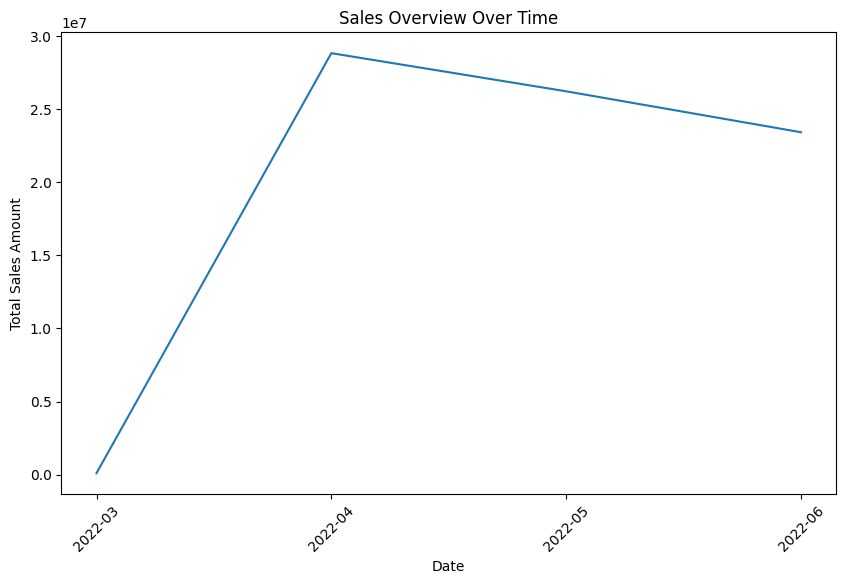

In [12]:
# Convert the 'date' column to datetime if it isn't already
data['Date'] = pd.to_datetime(data['Date'])

# Aggregate sales data by month or day
sales_over_time = data.groupby(data['Date'].dt.to_period("M")).agg({'Amount': 'sum'}).reset_index()

# Plot sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_over_time['Date'].astype(str), y=sales_over_time['Amount'])
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.title('Sales Overview Over Time')
plt.xticks(rotation=45)
plt.show()


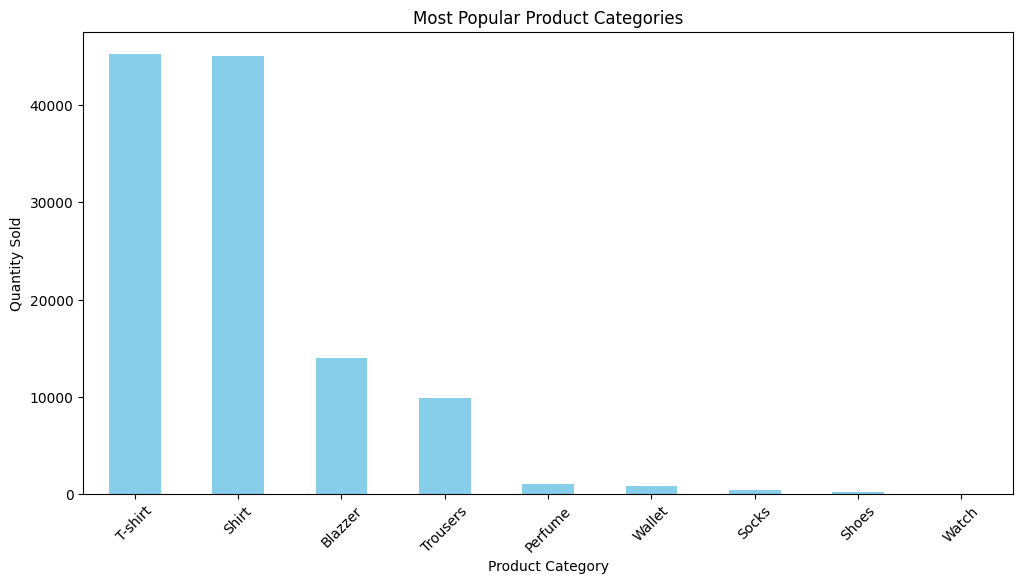

In [13]:
# Analyzing most popular product categories
product_popularity = data.groupby('Category')['Qty'].sum().sort_values(ascending=False)

# Plot product popularity
plt.figure(figsize=(12, 6))
product_popularity.plot(kind='bar', color='skyblue')
plt.title('Most Popular Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


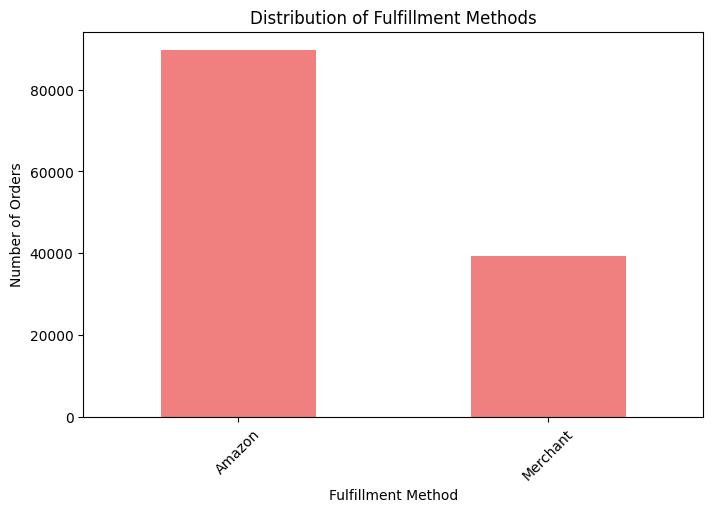

In [14]:
# Count orders by fulfillment method
fulfillment_counts = data['Fulfilment'].value_counts()

# Plot fulfillment method distribution
plt.figure(figsize=(8, 5))
fulfillment_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Fulfillment Methods')
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


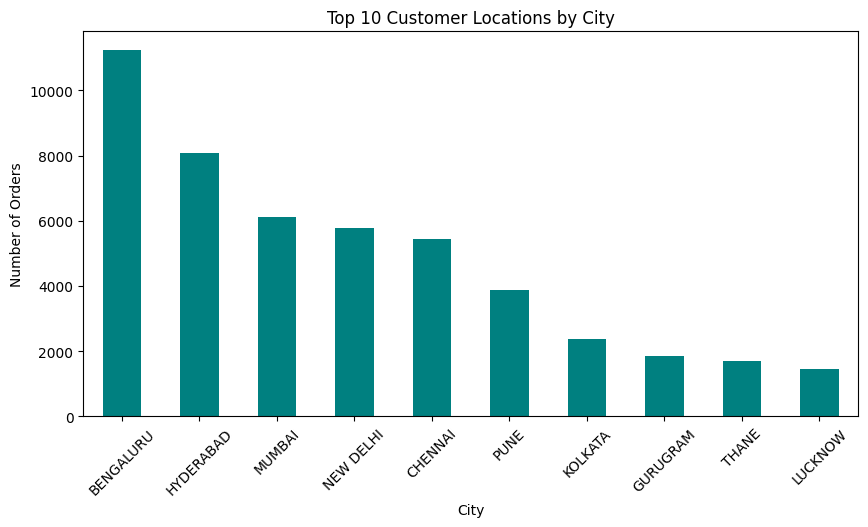

In [15]:
# Count orders by customer city
location_data = data['ship-city'].value_counts().head(10)  # Top 10 cities

# Plot top customer locations
plt.figure(figsize=(10, 5))
location_data.plot(kind='bar', color='teal')
plt.title('Top 10 Customer Locations by City')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


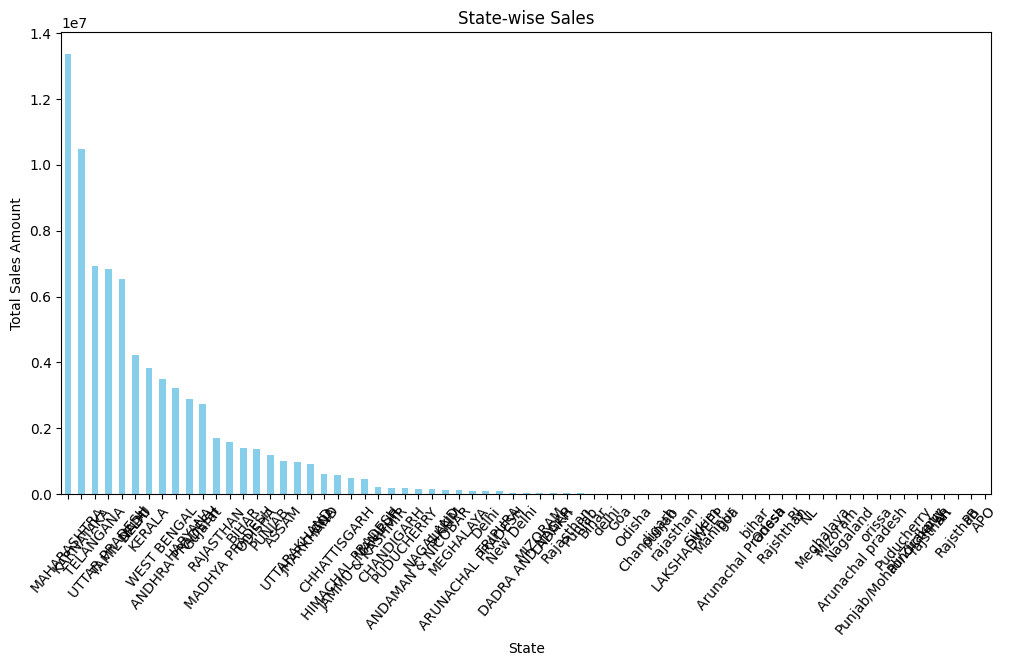

In [16]:
# Group data by ship-state and sum the sales amount
state_sales = data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

# Plot state-wise sales
plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar', color='skyblue')
plt.title('State-wise Sales')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=50)
plt.show()
